In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Exploratory Data Analysis

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


Used this to get a better idea of how many data points there were in the the data set, and how many null values there were in each column

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


#  Made a few graphs to get a better idea of how the data was distributed, and to see if we could identify any trends in the data

We initailly noticed how there was a disproportionate amount of people in the age range of 26-35, but after further research realized that this was very similar to the US cencus data. The censusdata said 30% of the population was inbetween the ages of 25-44, and this represented around 30.2 % of the population.


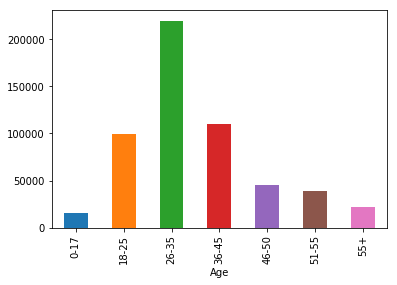

In [5]:
age = df.groupby("Age").size()
age.plot(kind="bar")

There were more people in city B than city A or C, but we felt there wasnt a disspropritionate amount. So we did not feel the need to adjust the test data to have a more even distribution.

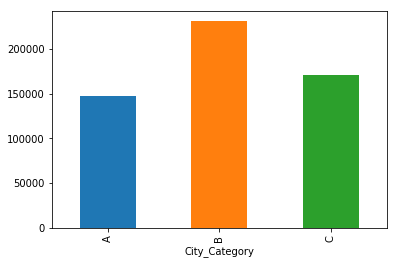

In [6]:
city_cat = df.groupby("City_Category").size().plot(kind="bar")

We noticed that there were a lot more males than femlaes in our data set. This might be an issue as the model might not be able to accuratly predict female purchase amounts due to the huge disparity between the amount of males and females represented in this data set. 

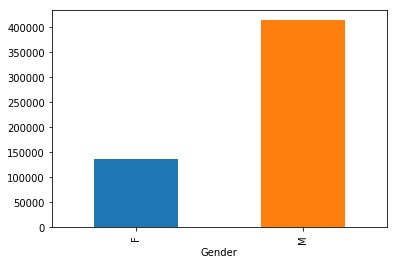

In [7]:
gender = df.groupby("Gender").size().plot(kind="bar")

We wanted to see how many unique product ids were in the data. This would give us a better sense of how to use this information to help our model predict purchase amount. 

In [8]:
df['Product_ID'].value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
P00184942    1440
P00046742    1438
P00058042    1422
P00145042    1406
P00059442    1406
P00237542    1394
P00255842    1383
P00117942    1364
P00110942    1360
P00010742    1350
P00220442    1282
P00110842    1281
P00117442    1260
P00051442    1249
P00102642    1246
P00278642    1226
P00242742    1215
P00034742    1212
P00148642    1204
P00080342    1203
P00031042    1200
P00028842    1197
P00251242    1187
P00114942    1178
P00000142    1152
             ... 
P00104342       1
P00072042       1
P00057842       1
P00166442       1
P00022042       1
P00156642       1
P00169842       1
P00063642       1
P00301942       1
P00143442       1
P00329042       1
P00070142       1
P00012942       1
P00301442       1
P00013442       1
P00074542       1
P00077242       1
P00340742       1
P00185942       1
P00215142       1
P00008942       1
P00203242       1
P00203942       1
P00307242       1
P00075042 

we wanted to explore some preliminary statistics for the data, but realized the only non categorical variable that used intgers was purchse. This did give us a good idea of how the purchase amounts were distributed and what kinds of values to expect when we ran our machine learning models on the data

In [9]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


we created a histrogram for most of the categorical variables in the data set to see if there were any patterns or trends we could notice right of the bat. We made the histograms for age and city before as they used letters instead of digits to represent the information, and the hist fucntion couldnt graph them with all the other variables.

df.hist(bins=50, figsize=(20,15))
plt.show()

# Why it matters?

Creating a machine learning model that can accurately predict the purchase amount from data about the buyer can be very useful for comapnies. Since the data we are analyzing is from black friday sales, the biggest shopping day in the US, it can better inform companies how much people are willing to pay for a certain product based on information about them. Since a lot of the categorical data we had was masked, we cant exactly specify which types of products people are willing to spend on. However, since the organization who realeased this data does know what the masked values map to, this information can be used to effectively target certain groups of people based on the products and purchase amount. 

This can help companies determine how much to markdown the product, while still being able to make the most money. Marking down the products to aggressivly or not aggressivly enough can lead to high losses for the company. This is to big of a risk to take, especially during Black Friday when people are most likely to splurge on shopping. This information can also help companies target certain groups of customers more effectively based on their willingness to pay. By having better targeted ad campaigns, companies can expect sales to go up since the right customers become more aware of the products and sales happening. 

Another big benefit this model could provide companies insight on which products to stock up on for big sale events. By figuring out which product types have a lot of customers wanting to buy them and their willingess to pay for these products, companies can select the product mix that would maximize profits for them. This would also increase 
customer satisfaction, as it would look like the companies know exactly what the customers want and how much they want to spend on it. Which would provide many benefits in the long run.  


